In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_auc_score
from imblearn.over_sampling import SMOTE

We started by importing the required libraries for analysing the creditcard fraud detection by importing logistic rgression,confusion matrix , train test spliter and etc.

In [7]:
from google.colab import drive
drive.mount('/content/drive')

data_path = '/content/drive/My Drive/creditcard.csv'
data = pd.read_csv(data_path)
data.head()


Mounted at /content/drive


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


And then by loading the creditcard.csv dataset into a pandas DataFrame. This dataset contains information about credit card transactions, where the Class column indicates whether a transaction is genuine (0) or fraudulent (1). We explore the dataset to understand its structure, check for missing values, and identify key features.

In [8]:
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


next checked for any null values in the data set if any then to fill them with median values of the column.

In [9]:
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))

data = data.drop(columns=['Time'], axis=1)

Pre-processing involves scaling the numerical features (such as Amount) and separating the target variable (Class) from the predictors. Features are normalized to ensure that all values are on a comparable scale, which is essential for many machine learning models.

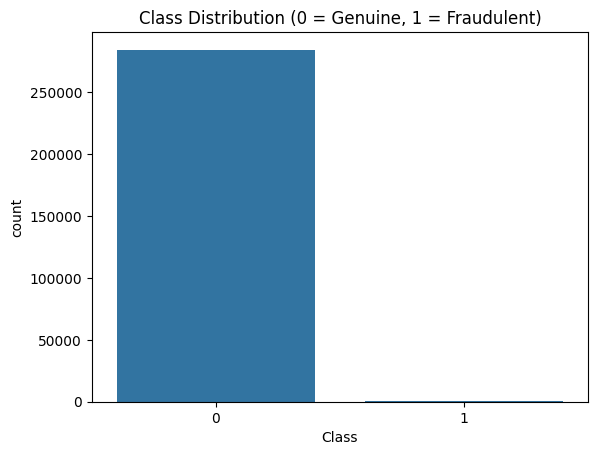

In [10]:
# Check class distribution
sns.countplot(x='Class', data=data)
plt.title("Class Distribution (0 = Genuine, 1 = Fraudulent)")
plt.show()

# Separate features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

The dataset is highly imbalanced, with fraudulent transactions being a minority class.Then visualized the count of class using countplot to analyse about the genuine and fradulent count comparison.

In [12]:
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

print(y_resampled.value_counts())

Class
0    284315
1    284315
Name: count, dtype: int64


 To address this, we apply SMOTE (Synthetic Minority Oversampling Technique) to generate synthetic samples for the minority class and balance the dataset.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

The dataset is divided into training and testing sets using an 80:20 ratio.

In [16]:
lr_y_pred = lr_model.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_y_pred))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     85149
           1       0.97      0.92      0.95     85440

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589



The training set is used to train the model, while the testing set evaluates the model's performance on unseen data.

In [20]:
rf_model = RandomForestClassifier(
    n_estimators=50,
    max_depth=10,
    max_features='sqrt',
    n_jobs=-1,
    random_state=42
)
rf_model.fit(X_train, y_train)

rf_y_pred = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_y_pred))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     85149
           1       1.00      0.98      0.99     85440

    accuracy                           0.99    170589
   macro avg       0.99      0.99      0.99    170589
weighted avg       0.99      0.99      0.99    170589



A Random Forest model is trained to classify transactions as fraudulent or genuine. Random Forest is a powerful ensemble method that uses multiple decision trees to improve classification accuracy.

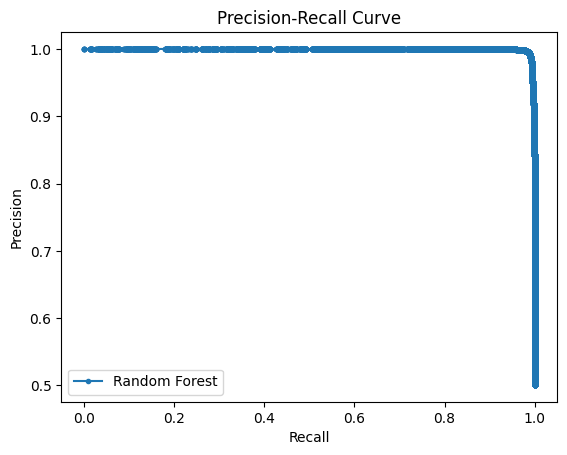

In [22]:
y_proba = rf_model.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_proba)

plt.plot(recall, precision, marker='.', label='Random Forest')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

The model's performance is evaluated using metrics like precision, recall, F1-score, and a confusion matrix. Precision and recall are particularly important in fraud detection, as we aim to minimize false negatives (missing fraudulent transactions).

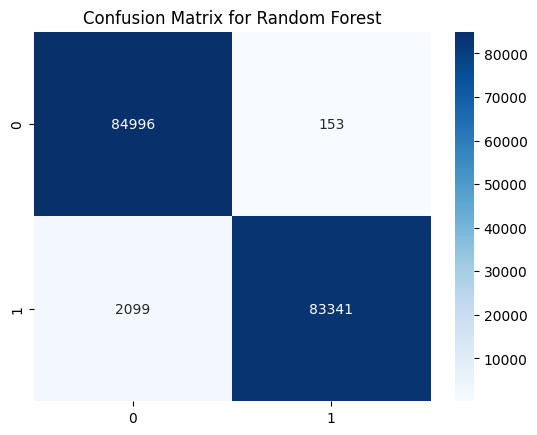

In [23]:
conf_matrix = confusion_matrix(y_test, rf_y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Random Forest")
plt.show()

Provides a detailed view of model predictions, showing true positives, false positives, true negatives, and false negatives.

# Class Distribution Before and After Balancing

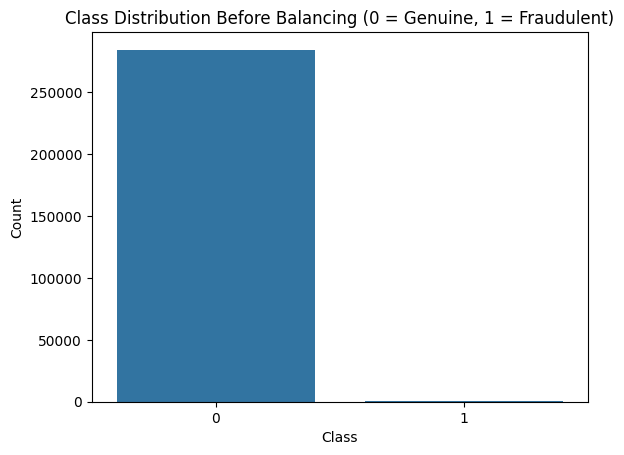

In [24]:
sns.countplot(x='Class', data=data)
plt.title("Class Distribution Before Balancing (0 = Genuine, 1 = Fraudulent)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

**Before Balancing:** Shows the severe imbalance in the dataset, with far fewer fraudulent transactions compared to genuine ones.

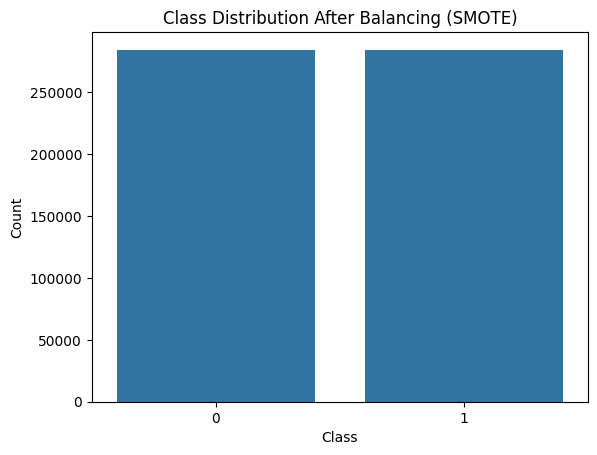

In [25]:
sns.countplot(x=y_resampled)
plt.title("Class Distribution After Balancing (SMOTE)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

**After Balancing:** Demonstrates how SMOTE has balanced the class distribution, enabling the model to learn effectively from both classes.

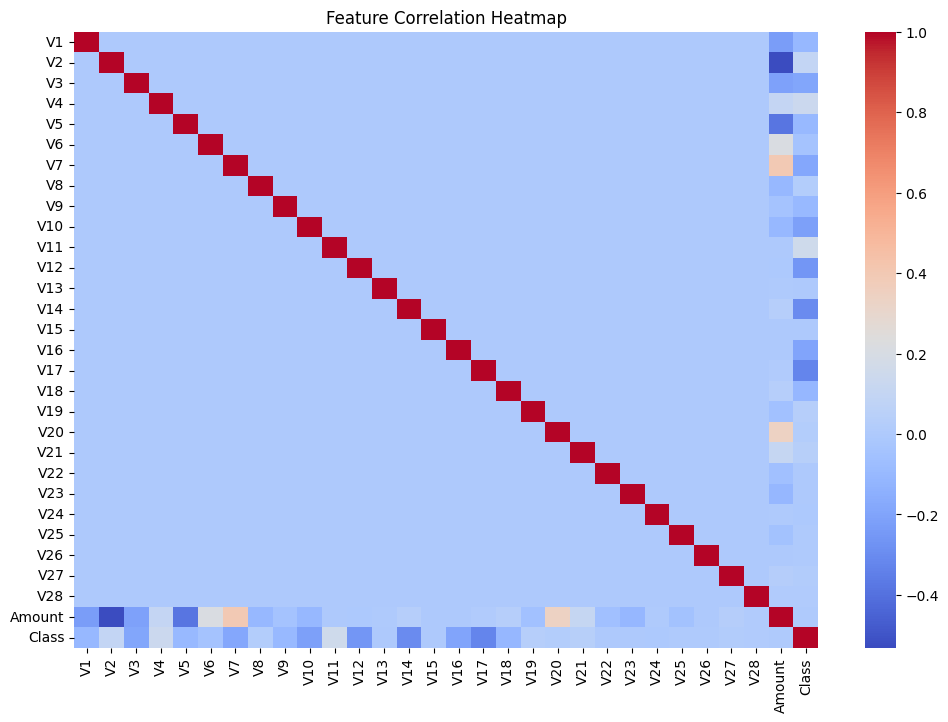

In [26]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

**Correlation Heatmap**
Visualizes correlations between features, helping identify highly correlated variables. Correlations can indicate redundancy or relationships between features.

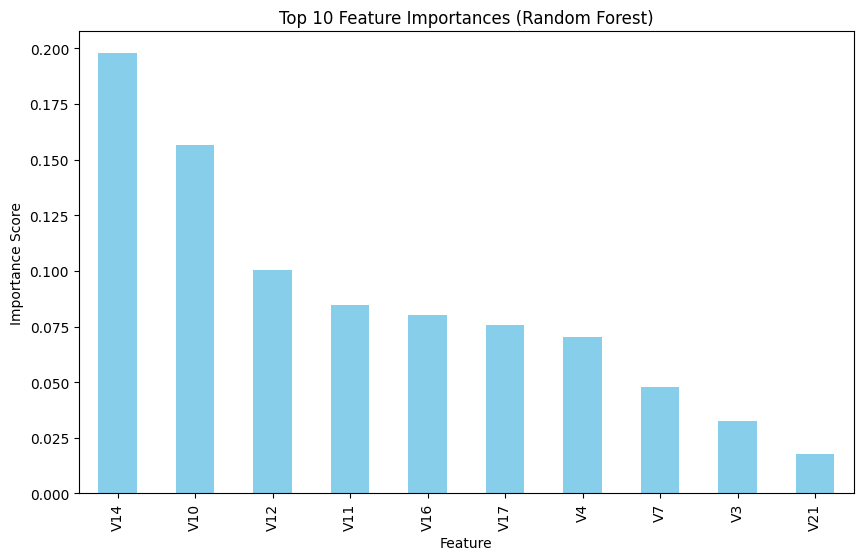

In [27]:
importances = rf_model.feature_importances_
feature_names = X_train.columns
feat_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feat_importances[:10].plot(kind='bar', color='skyblue')  # Top 10 important features
plt.title("Top 10 Feature Importances (Random Forest)")
plt.ylabel("Importance Score")
plt.xlabel("Feature")
plt.show()


**Feature Importance**
Displays the top features contributing to the model’s decision-making. Important features help interpret the model and prioritize future data collection.

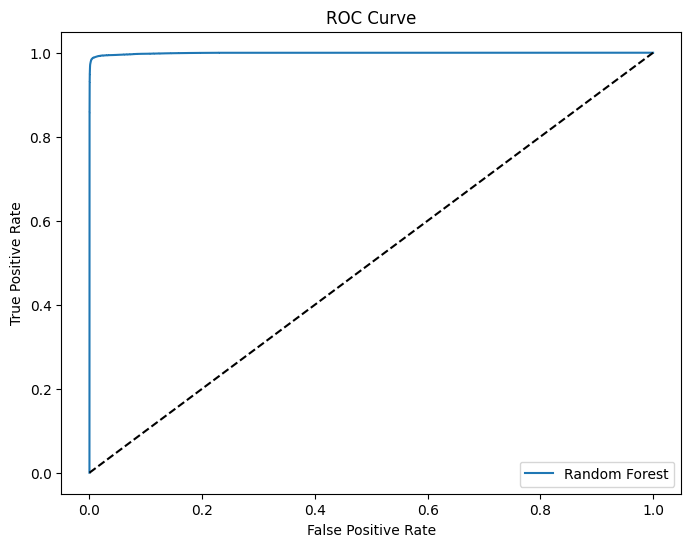

In [28]:
from sklearn.metrics import roc_curve

y_proba_rf = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="Random Forest")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.show()


**ROC Curve**
Plots the trade-off between true positive rate (recall) and false positive rate at various thresholds. A curve closer to the top-left corner indicates better performance.

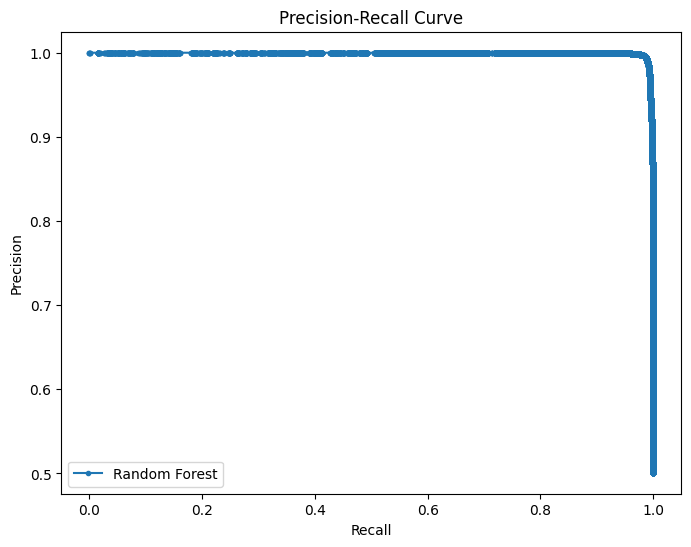

In [29]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_proba_rf)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Random Forest')
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()


**Preision-Recall Curve**
Highlights the balance between precision and recall for imbalanced datasets. This curve provides a clearer picture of performance than ROC for highly skewed classes.

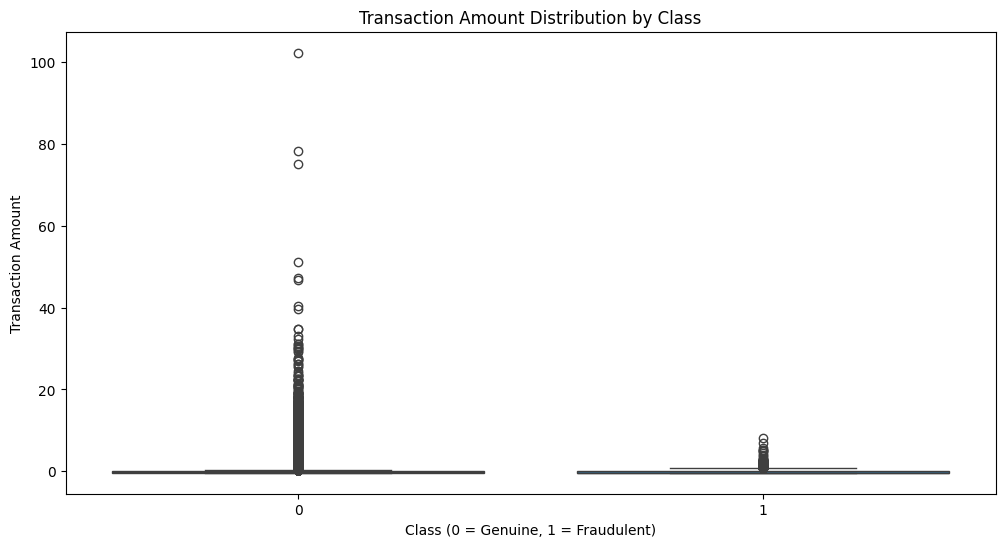

In [31]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Class', y='Amount', data=data)
plt.title("Transaction Amount Distribution by Class")
plt.xlabel("Class (0 = Genuine, 1 = Fraudulent)")
plt.ylabel("Transaction Amount")
plt.show()

**Fraud vs. Genuine: Distribution of Key Features**
Compares the distribution of key features (e.g., Amount) for fraudulent and genuine transactions. Patterns here may reveal distinguishing characteristics of fraud.

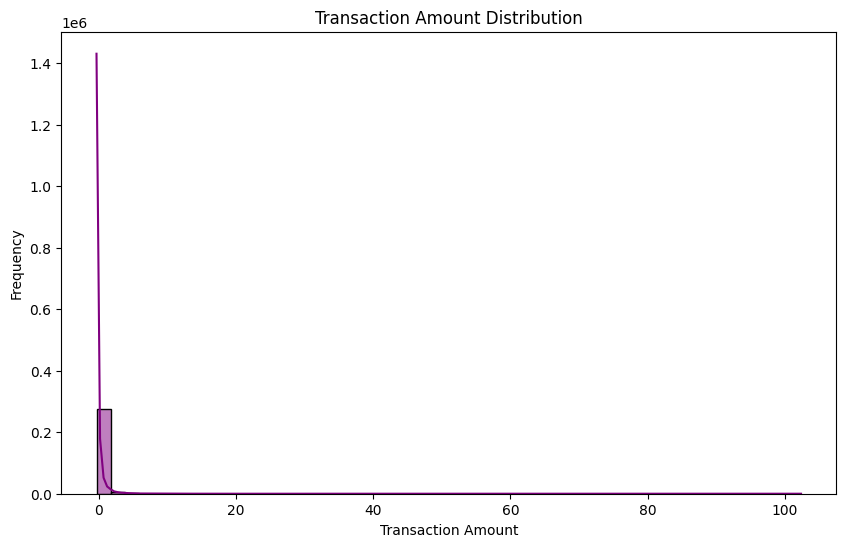

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Amount'], bins=50, kde=True, color='purple')
plt.title("Transaction Amount Distribution")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()

 ** Distribution of Transaction Amounts**
 Visualizes the distribution of transaction amounts, often showing that fraudulent transactions tend to have smaller amounts.